## **Task 2**: Decision Tree for Human Activity Recognition

## Necessary Work


### Importing Libraries


In [21]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,classification_report


### Running CombineScript.py



In [22]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This script combines the data from the UCI HAR Dataset into a more usable format.
# The data is combined into a single csv file for each subject and activity. 
# The data is then stored in the Combined folder.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
import pandas as pd
import numpy as np
import os

# Give the path of the test and train folder of UCI HAR Dataset
train_path = "./UCI HAR Dataset/train"
test_path = "./UCI HAR Dataset/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Traing Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_whitespace=True,header=None)


# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path,"subject_train.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(train_path,"y_train.txt"),delim_whitespace=True,header=None)


# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
        save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        data.to_csv(save_path,index=False)

print("Done Combining the training data")


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Test Data               
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whitespace=True,header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path,"subject_test.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path,"y_test.txt"),delim_whitespace=True,header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):
    
        sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
        labels = y.loc[sub_idxs]

        # Toggle through all the labels.
        for label in np.unique(labels.values):
    
            if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
                os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))
    
            label_idxs = labels[labels.iloc[:,0] == label].index
    
            accx = []
            accy = []
            accz = []
            for idx in label_idxs:
                if accx is not None:
                    accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                    accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                    accz = np.hstack((accz,total_acc_z.loc[idx][64:]))
    
                else:
                    accx = total_acc_x.loc[idx]
                    accy = total_acc_y.loc[idx]
                    accz = total_acc_z.loc[idx]
    
            # saving the data into csv file
            data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
            save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
            data.to_csv(save_path,index=False)

print("Done Combining the testing data")
print("Done Combining the data")

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

C:\Users\Parth Dembla\AppData\Local\Temp\ipykernel_26380\86021575.py:35: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
C:\Users\Parth Dembla\AppData\Local\Temp\ipykernel_26380\86021575.py:36: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
C:\Users\Parth Dembla\AppData\Local\Temp\ipykernel_26380\86021575.py:37: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt

Done Combining the training data


C:\Users\Parth Dembla\AppData\Local\Temp\ipykernel_26380\86021575.py:90: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
C:\Users\Parth Dembla\AppData\Local\Temp\ipykernel_26380\86021575.py:91: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
C:\Users\Parth Dembla\AppData\Local\Temp\ipykernel_26380\86021575.py:92: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),del

Done Combining the testing data
Done Combining the data


### Running the MakeDataset.py


In [23]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


# Question-1

**Q1. Use Sklearn Library to train Decision Trees.**

- Train a decision tree model using the raw accelerometer data.  
  Report the **accuracy, precision, recall, and confusion matrix** of the model.

- Train a decision tree model using the features obtained by **TSFEL**.  
  Report the **accuracy, precision, recall, and confusion matrix** of the model.

- Train a decision tree model using the **features provided in the dataset**.  
  Report the **accuracy, precision, recall, and confusion matrix** of the model.

- **Compare** the results of the three models. Which model do you think is better?




##### 1.1 Train a decision tree model using the raw accelerometer data.

Loading the dataset

In [24]:
X_train_raw = X_train
X_test_raw = X_test
y_test_raw = y_test
y_train_raw = y_train
print("Training data shape: ",X_train_raw.shape)
print("Testing data shape: ",X_test_raw.shape)
print("training output shape: ",y_train_raw.shape)
print("testing output shape: ",y_test_raw.shape)

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)
training output shape:  (126,)
testing output shape:  (54,)


Flattening the data , reshaping from (126,500,3) to (126,1500)

In [25]:
X_train_raw_flat = X_train.reshape(X_train_raw.shape[0], -1)  # (126, 1500)
X_test_raw_flat = X_test.reshape(X_test_raw.shape[0], -1)     # (54, 1500)

Using sklearn decision tree classifier libraries

In [26]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_raw_flat, y_train_raw)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Now predict the decision tree on test data

In [27]:
y_pred_raw = clf.predict(X_test_raw_flat)

Reporting the matrix, accuracy, precision, recall

In [28]:
# Report metrics

acc = accuracy_score(y_test_raw, y_pred_raw)
prec = precision_score(y_test_raw, y_pred_raw, average='weighted', zero_division=0)
rec = recall_score(y_test_raw, y_pred_raw, average='weighted')

print("Decision Tree Classifier Performance:")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_raw, y_pred_raw))


Decision Tree Classifier Performance:
Accuracy : 0.6111
Precision: 0.5611
Recall   : 0.6111

Classification Report:
              precision    recall  f1-score   support

           1       0.25      0.22      0.24         9
           2       0.50      0.56      0.53         9
           3       0.25      0.11      0.15         9
           4       0.67      0.89      0.76         9
           5       0.80      0.89      0.84         9
           6       0.90      1.00      0.95         9

    accuracy                           0.61        54
   macro avg       0.56      0.61      0.58        54
weighted avg       0.56      0.61      0.58        54



Now plotting the confusion matrix

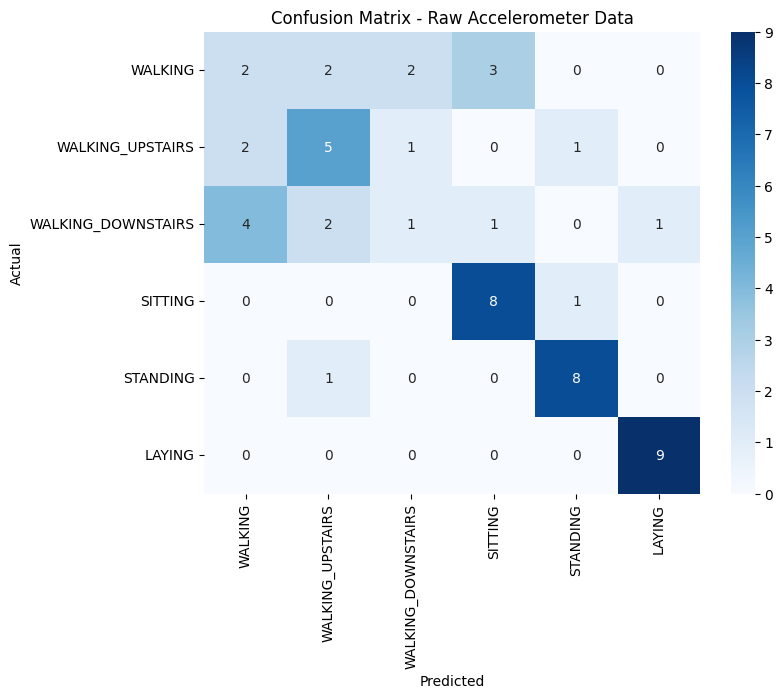

In [29]:

labels = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}
cm = confusion_matrix(y_test_raw, y_pred_raw)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            
             xticklabels=list(labels.values()), yticklabels=list(labels.values()))
plt.title("Confusion Matrix - Raw Accelerometer Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### 1.2 Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.

Loading TSFEL features

In [30]:
import tsfel

# Extract features using TSFEL
cfg = tsfel.get_features_by_domain()  # Get all features by default
X_train_tsfel = tsfel.time_series_features_extractor(cfg, X_train, verbose=1,fs =50)
X_test_tsfel = tsfel.time_series_features_extractor(cfg, X_test, verbose=1,fs =50)
y_train_tsfel = y_train
y_test_tsfel = y_test
print(f"X_train_tsfel: {X_train_tsfel.shape}")
print(f"X_test_tsfel: {X_test_tsfel.shape}")
print(f"y_train: {y_train_tsfel.shape}")
print(f"y_test: {y_test_tsfel.shape}")

X_train_tsfel: (126, 468)
X_test_tsfel: (54, 468)
y_train: (126,)
y_test: (54,)


training the decision tree based on TSFEL 

In [31]:
# Train Decision Tree
dt_tsfel = DecisionTreeClassifier(random_state=42)
dt_tsfel.fit(X_train_tsfel, y_train_tsfel)

with open("dt_tsfel.pkl", "wb") as f:
    pickle.dump(dt_tsfel, f)
# Predictions
y_pred_tsfel = dt_tsfel.predict(X_test_tsfel)

# Evaluation metrics
acc_tsfel = accuracy_score(y_test_tsfel, y_pred_tsfel)
prec_tsfel = precision_score(y_test_tsfel, y_pred_tsfel, average="macro", zero_division=0)
rec_tsfel = recall_score(y_test_tsfel, y_pred_tsfel, average="macro", zero_division=0)

print("Decision Tree with TSFEL Features")
print(f"Accuracy :  {acc_tsfel:.4f}")
print(f"Precision: {prec_tsfel:.4f}")
print(f"Recall   : {rec_tsfel:.4f}")



Decision Tree with TSFEL Features
Accuracy :  0.8889
Precision: 0.8962
Recall   : 0.8889


Plotting the confusion matrix 

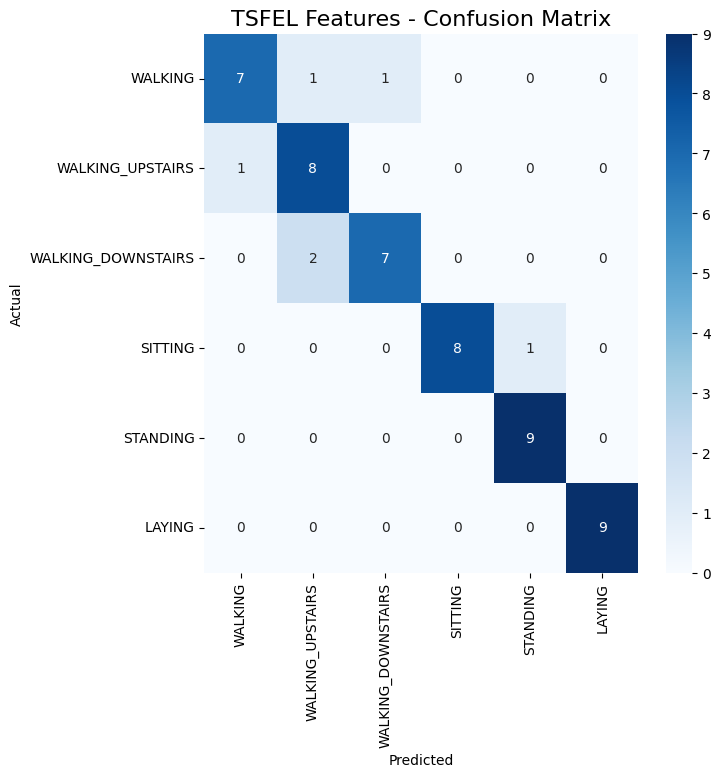

In [32]:
labels = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

cm_tsfel = confusion_matrix(y_test_tsfel, y_pred_tsfel, labels=list(labels.keys()))

plt.figure(figsize=(7,7))
sns.heatmap(
    cm_tsfel, annot=True, fmt="d", cmap="Blues",
    xticklabels=list(labels.values()), yticklabels=list(labels.values())
)
plt.title("TSFEL Features - Confusion Matrix", fontsize=16)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 1.3 Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.

loading the data

In [33]:
train_path = "./UCI HAR Dataset/train"
test_path = "./UCI HAR Dataset/test"

# Load data
X_train_UCI = np.loadtxt(f"{train_path}/X_train.txt")
y_train_UCI = np.loadtxt(f"{train_path}/y_train.txt").astype(int)

X_test_UCI = np.loadtxt(f"{test_path}/X_test.txt")
y_test_UCI = np.loadtxt(f"{test_path}/y_test.txt").astype(int)

print("Shapes:")
print(f"X_train: {X_train_UCI.shape}, y_train: {y_train_UCI.shape}")
print(f"X_test:  {X_test_UCI.shape}, y_test:  {y_test_UCI.shape}")


Shapes:
X_train: (7352, 561), y_train: (7352,)
X_test:  (2947, 561), y_test:  (2947,)


Training Decision tree

In [34]:
dt_har = DecisionTreeClassifier(random_state=42)
dt_har.fit(X_train_UCI, y_train_UCI)
y_pred_UCI = dt_har.predict(X_test_UCI)


Reporting accuracy, matrix , precision , recall

In [35]:
acc = accuracy_score(y_test_UCI, y_pred_UCI)
prec = precision_score(y_test_UCI, y_pred_UCI, average="macro", zero_division=0)
rec = recall_score(y_test_UCI, y_pred_UCI, average="macro", zero_division=0)

print("Decision Tree with UCI HAR Provided Features")
print(f"Accuracy :  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test_UCI, y_pred_UCI, zero_division=0))

Decision Tree with UCI HAR Provided Features
Accuracy :  0.8622
Precision: 0.8625
Recall   : 0.8587

Classification Report:

              precision    recall  f1-score   support

           1       0.83      0.92      0.87       496
           2       0.83      0.78      0.80       471
           3       0.89      0.83      0.86       420
           4       0.83      0.76      0.80       491
           5       0.80      0.86      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947



Plotting Confusion Matrix

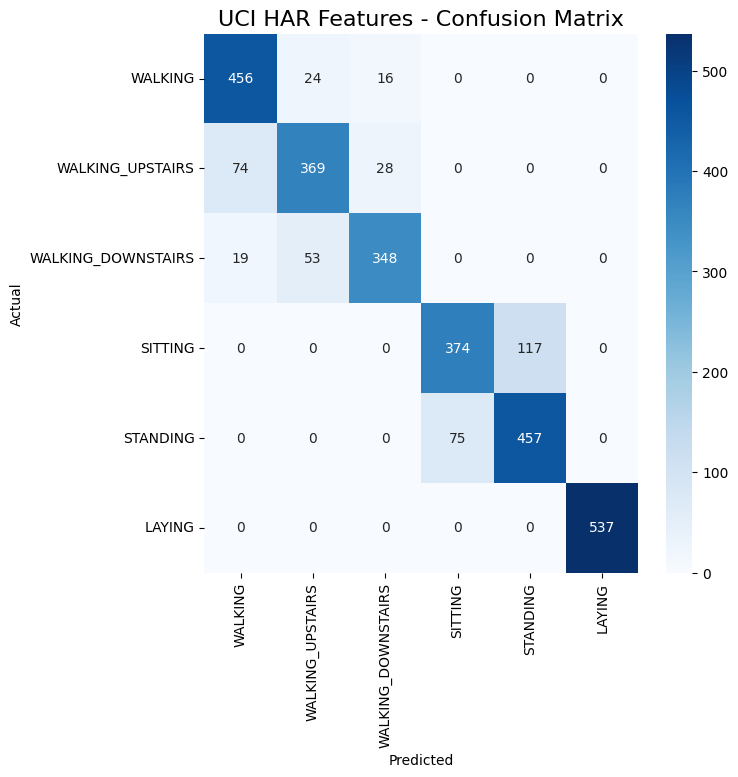

In [36]:
labels = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

cm = confusion_matrix(y_test_UCI, y_pred_UCI, labels=list(labels.keys()))

plt.figure(figsize=(7,7))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=list(labels.values()), yticklabels=list(labels.values())
)
plt.title("UCI HAR Features - Confusion Matrix", fontsize=16)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 1.4 Compare the results of the three models. Which model do you think is better?

On comparing the results of the 3 models shown above, the model that uses tsfel features performs the best having accuracy of around 88.89%, then comes the model which uses the features provided in UCI-HAR dataset with an accuracy of 86.22% and model that uses raw accelerometer data performs the worst with an accuracy of 61.11%. this highlights that raw signals without engineered features do not provide sufficient separability for robust classification. Thus, the results demonstrate the importance of feature extraction, with TSFEL features offering the most discriminative representation for this task.

---

# Question-2

Train Decision Tree with varying depths (2-8) using all above 3 methods. Plot the accuracy of the model on test data vs the depth of the tree. 

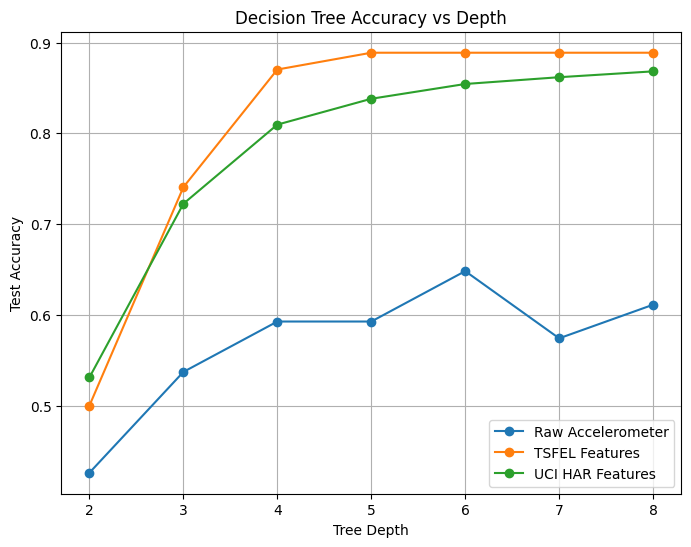

In [37]:
depths = range(2, 9)
acc_raw, acc_tsfel, acc_har = [], [], []

for d in depths:
    # Raw Accelerometer
    dt_raw = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt_raw.fit(X_train_raw_flat, y_train_raw)  
    y_pred_raw = dt_raw.predict(X_test_raw_flat)
    acc_raw.append(accuracy_score(y_test_raw, y_pred_raw))
    
    # TSFEL Features
    dt_tsfel = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt_tsfel.fit(X_train_tsfel, y_train_tsfel)
    y_pred_tsfel = dt_tsfel.predict(X_test_tsfel)
    acc_tsfel.append(accuracy_score(y_test_tsfel, y_pred_tsfel))
    
    # UCI HAR Provided Features
    dt_har = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt_har.fit(X_train_UCI, y_train_UCI)   
    y_pred_har = dt_har.predict(X_test_UCI)
    acc_har.append(accuracy_score(y_test_UCI, y_pred_har))

# Plot
plt.figure(figsize=(8,6))
plt.plot(depths, acc_raw, marker='o', label="Raw Accelerometer")
plt.plot(depths, acc_tsfel, marker='o', label="TSFEL Features")
plt.plot(depths, acc_har, marker='o', label="UCI HAR Features")
plt.title("Decision Tree Accuracy vs Depth")
plt.xlabel("Tree Depth")
plt.ylabel("Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()


---

# Question-3

Are there any participants/ activitivies where the Model performace is bad? If Yes, Why?

**Model Trained Raw Accelerometer Data** : This model performs poorly (accuracy: 61.11%) because the raw data only provides 3 axes (features) per time step, and the classifier struggles to distinguish between similar activities like walking, walking upstairs, and walking downstairs. The lack of engineered features leads to underfitting and poor separability.


**Model Trained using TSFEL Feature Extraction Data**: This model achieves the highest accuracy (88.9%) because TSFEL extracts a rich set of statistical, temporal, and spectral features from each axis, greatly improving the model’s ability to differentiate between activities.

**Model trained using provided UCI-HAR dataset**:This model performs better than the raw data (accuracy: 86%) but slightly worse than the TSFEL features. The UCI-HAR features are engineered but may not capture as much discriminative information as the full TSFEL set.

---